In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset from a CSV file
df = pd.read_csv('fitness.csv')

In [45]:
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68     190      94        29         105       40.8   
1  14861698  female   20     166      60        14          94       40.3   
2  11179863    male   69     179      79         5          88       38.7   
3  16180408  female   34     179      71        13         100       40.5   
4  17771927  female   27     154      58        10          81       39.8   

   Calories  
0       231  
1        66  
2        26  
3        71  
4        35

In [4]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [7]:
# Define the function to create age bins
def age_bin(age):
    if 20 <= age < 30:
        return '20-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    elif 60 <= age < 70:
        return '60-69'
    elif 70 <= age <= 79:
        return '70-79'
    else:
        return 'Out of Range'

# Apply the function to the Age column
df['Age_Bin'] = df['Age'].apply(age_bin)

In [9]:
df.head(6)

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68     190      94        29         105       40.8   
1  14861698  female   20     166      60        14          94       40.3   
2  11179863    male   69     179      79         5          88       38.7   
3  16180408  female   34     179      71        13         100       40.5   
4  17771927  female   27     154      58        10          81       39.8   
5  15130815  female   36     151      50        23          96       40.7   

   Calories Age_Bin  
0       231   60-69  
1        66   20-29  
2        26   60-69  
3        71   30-39  
4        35   20-29  
5       123   30-39

In [10]:
df.groupby('Age_Bin').describe()

User_ID                                                       \
          count          mean           std         min          25%   
Age_Bin                                                                
20-29    4387.0  1.499524e+07  2.849897e+06  10006441.0  12535966.00   
30-39    3115.0  1.497801e+07  2.882964e+06  10001607.0  12490375.50   
40-49    2394.0  1.499614e+07  2.840211e+06  10007686.0  12541970.25   
50-59    2011.0  1.497499e+07  2.932847e+06  10006606.0  12409121.50   
60-69    1664.0  1.481226e+07  2.863349e+06  10001159.0  12343517.50   
70-79    1429.0  1.508517e+07  2.898177e+06  10013063.0  12492198.00   

                                                Age             ... Body_Temp  \
                50%         75%         max   count       mean  ...       75%   
Age_Bin                                                         ...             
20-29    15020614.0  17403811.0  19999647.0  4387.0  24.240255  ...      40.6   
30-39    15013894.0  17474614.0  19999394.0  3115.0  34.314928  ...      40.6   
40-49    15004620.5  17321044.0  19991370.0  2394.0  44.302423  ...      40.6   
50-59    14907694.0  17540576.5  19998603.0  2011.0  54.353555  ...      40.6   
60-69    14782197.0  17244693.5  19962435.0  1664.0  64.301082  ...      40.6   
70-79    15167230.0  17647344.0  19998753.0  1429.0  74.354094  ...      40.6   

              Calories                                                         
          max    count        mean        std  min   25%   50%     75%    max  
Age_Bin                                                                        
20-29    41.5   4387.0   78.978345  55.711067  1.0  30.0  69.0  122.00  240.0  
30-39    41.4   3115.0   85.050722  59.503615  1.0  31.5  75.0  132.00  289.0  
40-49    41.4   2394.0   90.267335  61.688001  2.0  35.0  82.0  140.00  280.0  
50-59    41.4   2011.0   95.216310  64.332094  2.0  37.5  87.0  146.00  276.0  
60-69    41.3   1664.0  103.331130  69.255071  3.0  42.0  93.0  158.25  300.0  
70-79    41.5   1429.0  106.479356  70.634968  3.0  46.0  96.0  162.00  314.0  

[6 rows x 64 columns]

In [36]:
# Define features for clustering
features = ['Duration', 'Height', 'Weight', 'Heart_Rate', 'Body_Temp']
X = df[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

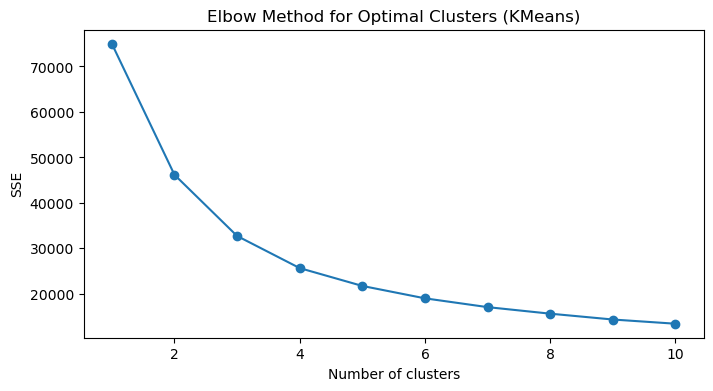

In [37]:
# Elbow Method for KMeans
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters (KMeans)')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [38]:

# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

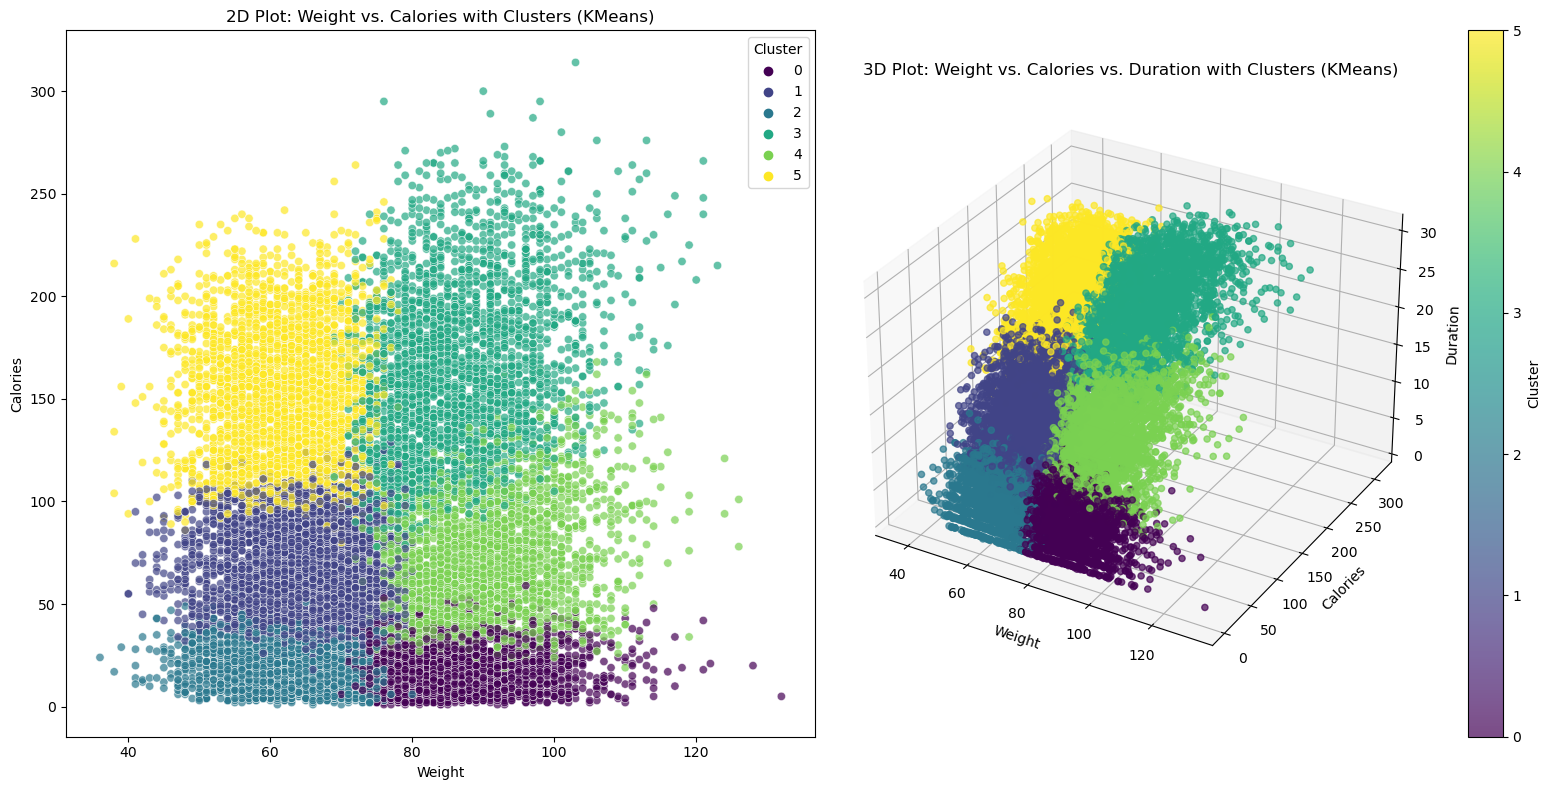

In [39]:

# Create subplots with one figure for 2D and another for 3D scatter plot
fig = plt.figure(figsize=(16, 8))

# 2D scatter plot
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(x='Weight', y='Calories', hue=df['KMeans_Cluster'], data=df, palette='viridis', ax=ax1, alpha=0.7)
ax1.set_title('2D Plot: Weight vs. Calories with Clusters (KMeans)')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Calories')
ax1.legend(title='Cluster')

# 3D scatter plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(df['Weight'], df['Calories'], df['Duration'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
fig.colorbar(scatter, ax=ax2, label='Cluster')
ax2.set_title('3D Plot: Weight vs. Calories vs. Duration with Clusters (KMeans)')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Calories')
ax2.set_zlabel('Duration')

# Show the plots
plt.tight_layout()
plt.show()

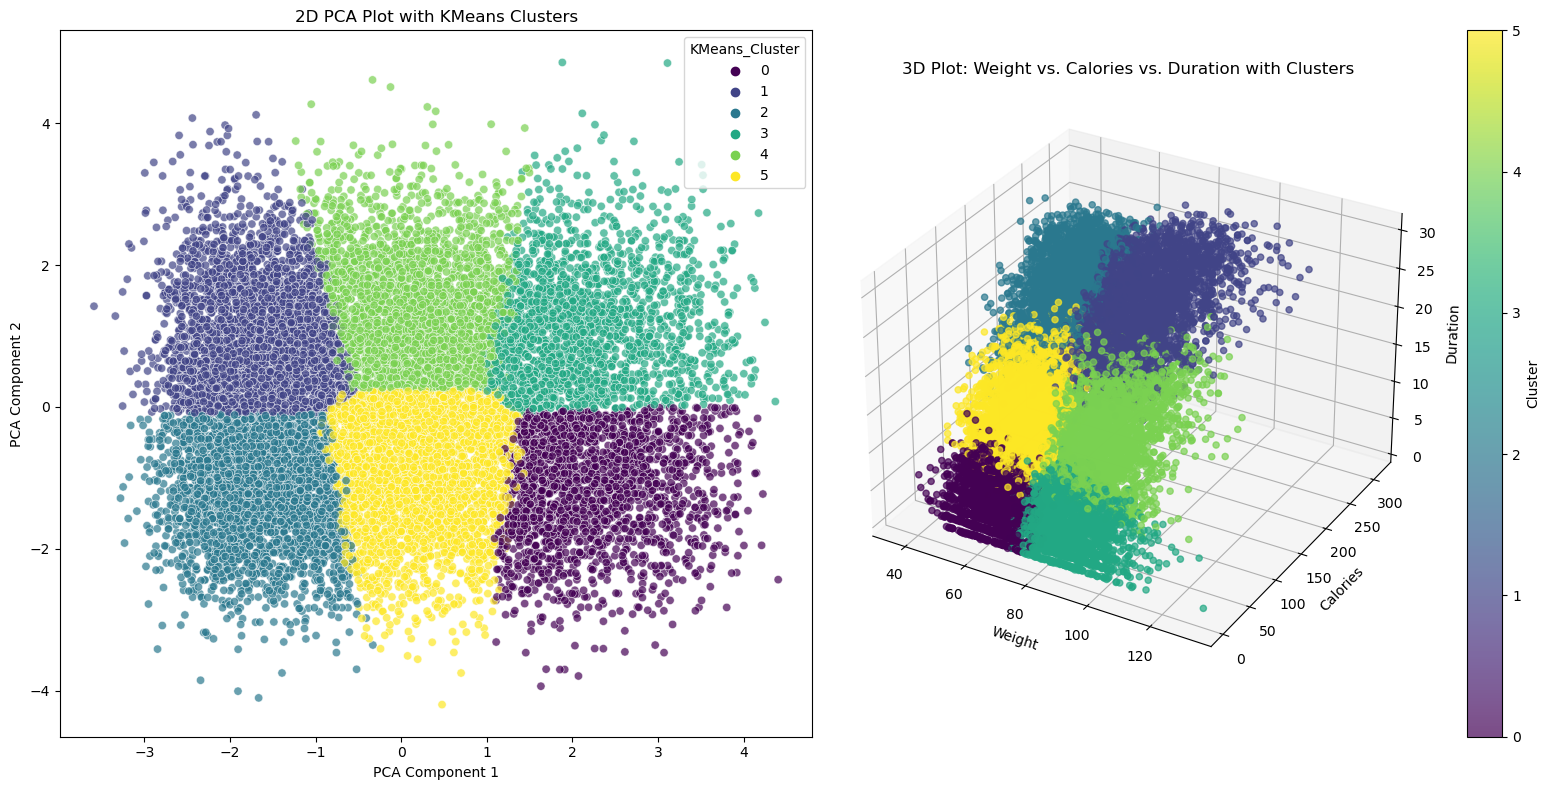

In [40]:
from sklearn.decomposition import PCA
# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
# Apply K-Means clustering on PCA-transformed data
kmeans = KMeans(n_clusters=6, random_state=42,n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_pca)


# 2D scatter plot
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='viridis', alpha=0.7)
plt.title('2D PCA Plot with KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# 3D scatter plot
ax2 = plt.subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(df['Weight'], df['Calories'], df['Duration'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, ax=ax2, label='Cluster')
ax2.set_title('3D Plot: Weight vs. Calories vs. Duration with Clusters')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Calories')
ax2.set_zlabel('Duration')

plt.tight_layout()
plt.show()

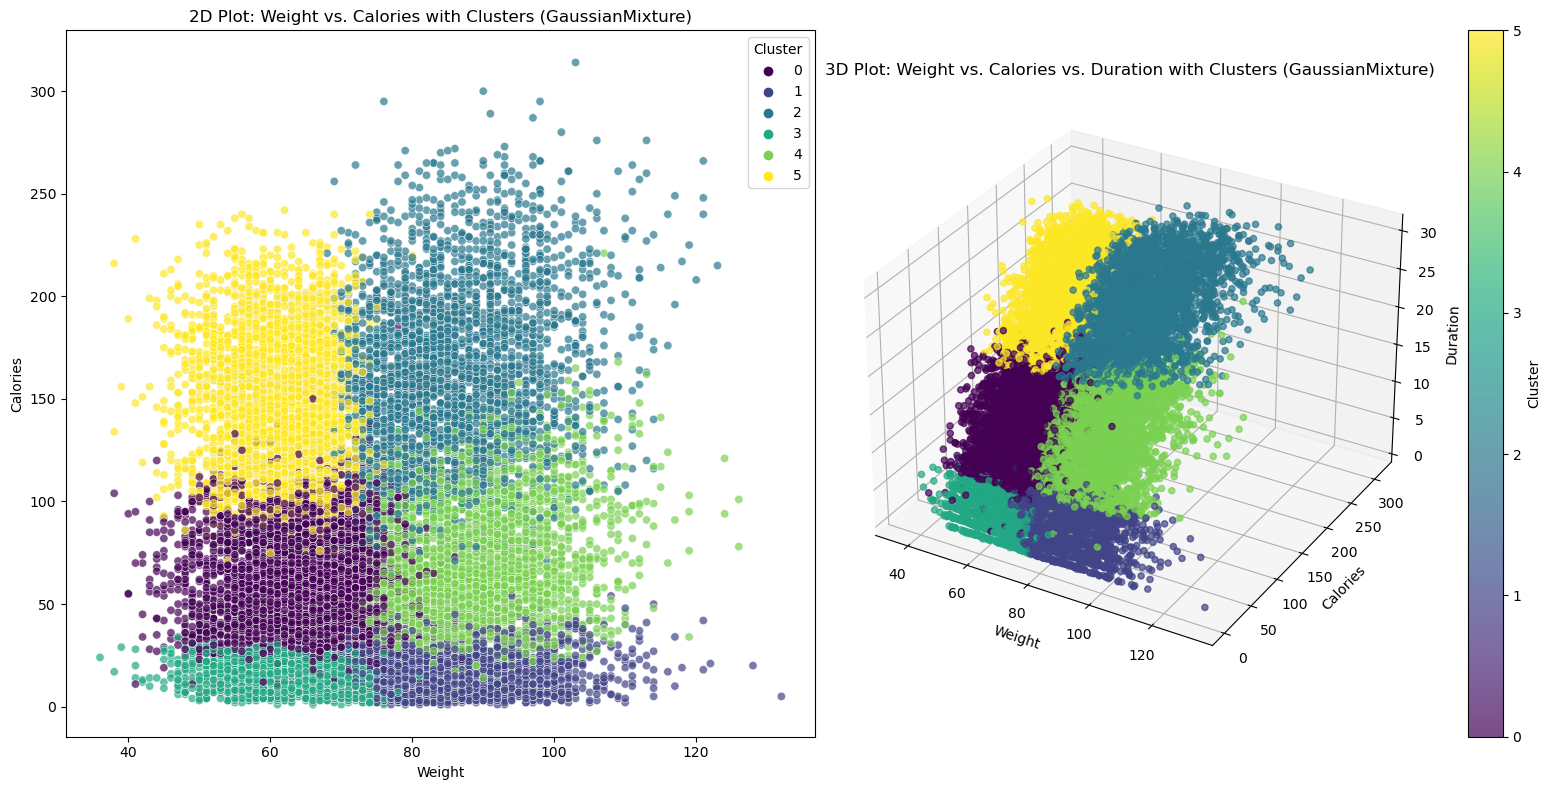

In [23]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=6, random_state=42)  # Adjust number of clusters as needed
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# Create subplots with one figure for 2D and another for 3D scatter plot
fig = plt.figure(figsize=(16, 8))

# 2D scatter plot
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(x='Weight', y='Calories', hue='GMM_Cluster', data=df, palette='viridis', ax=ax1, alpha=0.7)
ax1.set_title('2D Plot: Weight vs. Calories with Clusters (GaussianMixture)')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Calories')
ax1.legend(title='Cluster')

# 3D scatter plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(df['Weight'], df['Calories'], df['Duration'], c=df['GMM_Cluster'], cmap='viridis', alpha=0.7)
fig.colorbar(scatter, ax=ax2, label='Cluster')
ax2.set_title('3D Plot: Weight vs. Calories vs. Duration with Clusters (GaussianMixture)')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Calories')
ax2.set_zlabel('Duration')

# Show the plots
plt.tight_layout()
plt.show()

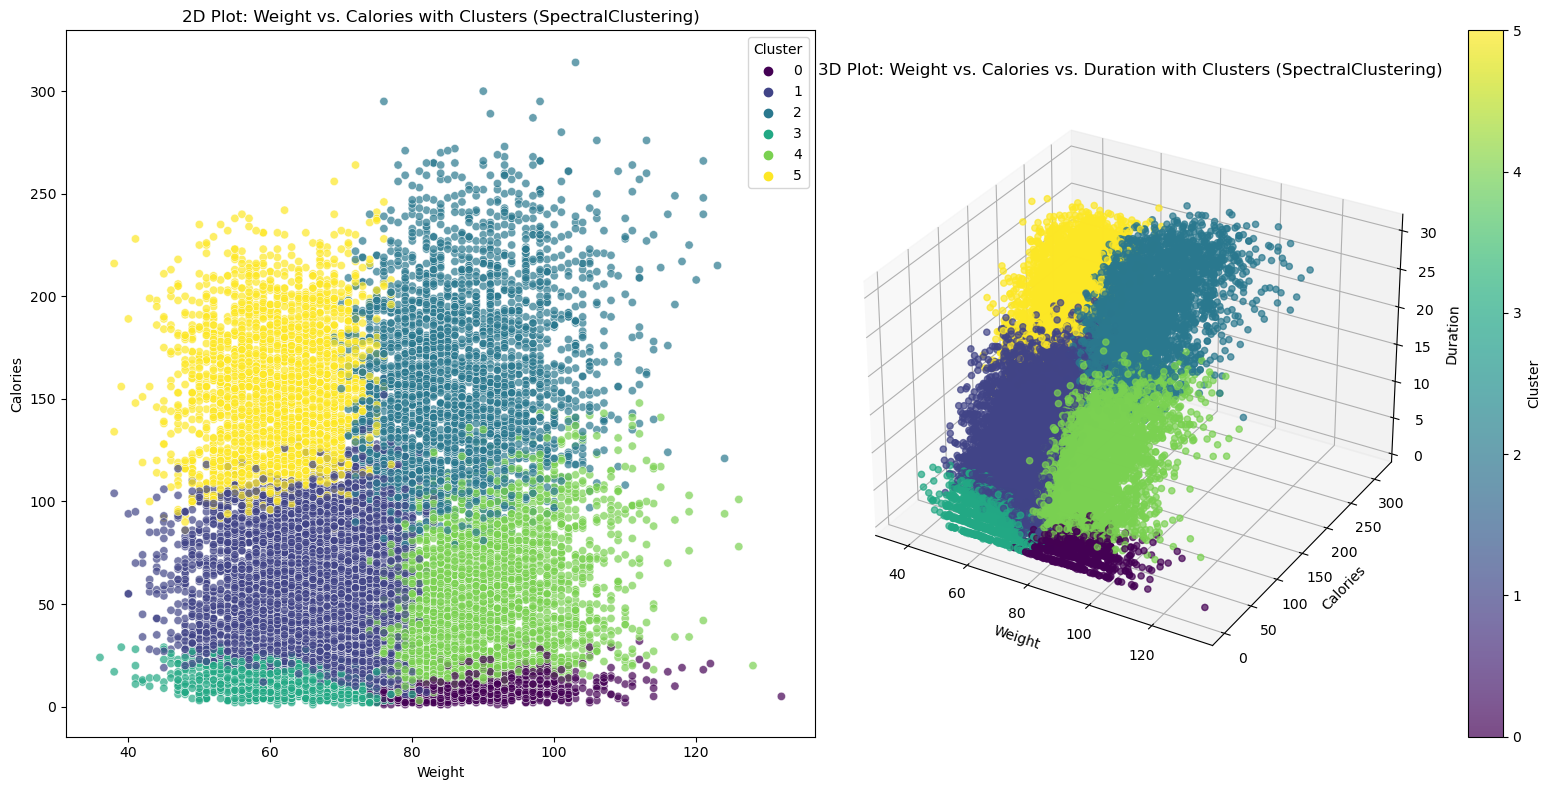

In [24]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=6, random_state=42)  # Adjust number of clusters as needed
df['Spectral_Cluster'] = spectral.fit_predict(X_scaled)

# Create subplots with one figure for 2D and another for 3D scatter plot
fig = plt.figure(figsize=(16, 8))

# 2D scatter plot
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(x='Weight', y='Calories', hue='Spectral_Cluster', data=df, palette='viridis', ax=ax1, alpha=0.7)
ax1.set_title('2D Plot: Weight vs. Calories with Clusters (SpectralClustering)')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Calories')
ax1.legend(title='Cluster')

# 3D scatter plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(df['Weight'], df['Calories'], df['Duration'], c=df['Spectral_Cluster'], cmap='viridis', alpha=0.7)
fig.colorbar(scatter, ax=ax2, label='Cluster')
ax2.set_title('3D Plot: Weight vs. Calories vs. Duration with Clusters (SpectralClustering)')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Calories')
ax2.set_zlabel('Duration')

# Show the plots
plt.tight_layout()
plt.show()


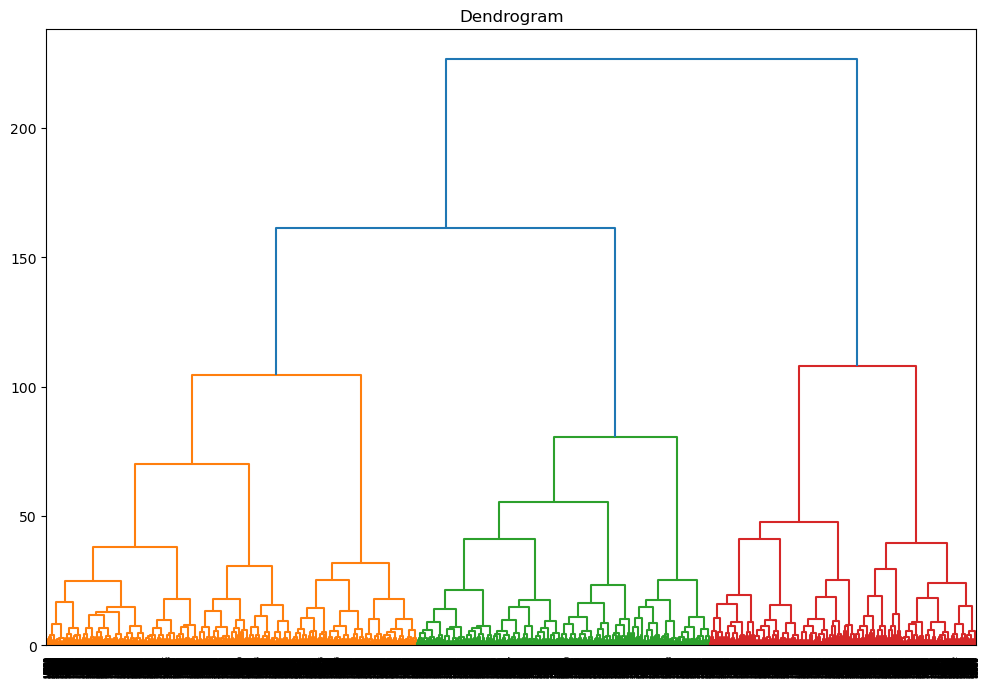

In [29]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=6)  # Adjust number of clusters as needed
df['hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

# Plot dendrogram
plt.figure(figsize=(12, 8))
linked = linkage(X_scaled, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()


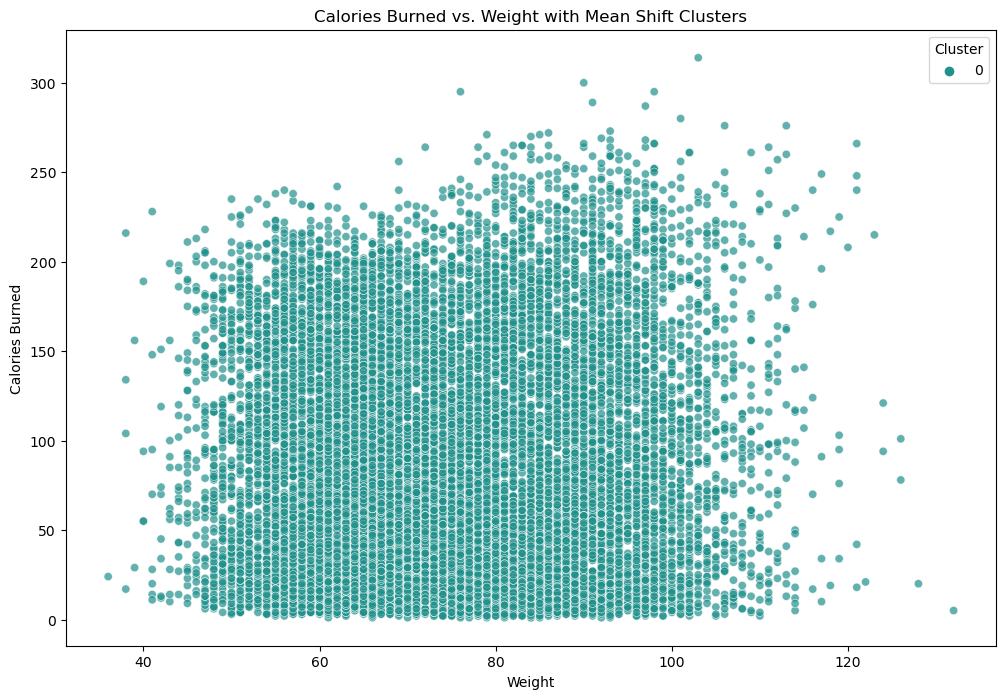

In [34]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimate bandwidth
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2)
mean_shift = MeanShift(bandwidth=bandwidth)
df['Meanshift_Cluster'] = mean_shift.fit_predict(X_scaled)

# Visualize
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Weight', y='Calories', hue='Meanshift_Cluster', data=df, palette='viridis', alpha=0.7)
plt.title('Calories Burned vs. Weight with Mean Shift Clusters')
plt.xlabel('Weight')
plt.ylabel('Calories Burned')
plt.legend(title='Cluster')
plt.show()


In [42]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)


In [43]:
from sklearn.metrics import silhouette_score

kmeans_labels = df['KMeans_Cluster']
gmm_labels = df['GMM_Cluster']
spectral_labels = df['Spectral_Cluster']
hierarchical_labels=df['hierarchical_Cluster']


kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
spectral_silhouette = silhouette_score(X_scaled, spectral_labels)
hierarchical_silhouette=silhouette_score(X_scaled, hierarchical_labels)
dbscan_silhouette = silhouette_score(X_scaled, df['DBSCAN_Cluster']) if len(set(df['DBSCAN_Cluster'])) > 1 else 'N/A'

print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"GMM Silhouette Score: {gmm_silhouette:.2f}")
print(f"Spectral Clustering Silhouette Score: {spectral_silhouette:.2f}")
print(f"Hierarchial Clustering Silhouette Score: {hierarchical_silhouette:.2f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")

K-Means Silhouette Score: 0.28
GMM Silhouette Score: 0.22
Spectral Clustering Silhouette Score: 0.26
Hierarchial Clustering Silhouette Score: 0.22
DBSCAN Silhouette Score: 0.22


In [32]:
from sklearn.metrics import davies_bouldin_score

kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels)
gmm_db = davies_bouldin_score(X_scaled, gmm_labels)
spectral_db = davies_bouldin_score(X_scaled, spectral_labels)
hierarchical_db=davies_bouldin_score(X_scaled, hierarchical_labels)

print(f"K-Means Davies-Bouldin Index: {kmeans_db:.2f}")
print(f"GMM Davies-Bouldin Index: {gmm_db:.2f}")
print(f"Spectral Clustering Davies-Bouldin Index: {spectral_db:.2f}")
print(f"hierarchical Clustering Davies-Bouldin Index: {hierarchical_db:.2f}")

K-Means Davies-Bouldin Index: 1.06
GMM Davies-Bouldin Index: 1.11
Spectral Clustering Davies-Bouldin Index: 0.98
hierarchical Clustering Davies-Bouldin Index: 1.08


In [33]:
from sklearn.metrics import calinski_harabasz_score

kmeans_ch = calinski_harabasz_score(X_scaled, kmeans_labels)
gmm_ch = calinski_harabasz_score(X_scaled, gmm_labels)
spectral_ch = calinski_harabasz_score(X_scaled, spectral_labels)
hierarchical_ch= calinski_harabasz_score(X_scaled, hierarchical_labels)

print(f"K-Means Calinski-Harabasz Index: {kmeans_ch:.2f}")
print(f"GMM Calinski-Harabasz Index: {gmm_ch:.2f}")
print(f"Spectral Clustering Calinski-Harabasz Index: {spectral_ch:.2f}")
print(f"Hierarchical Clustering Calinski-Harabasz Index: {hierarchical_ch:.2f}")


K-Means Calinski-Harabasz Index: 8827.65
GMM Calinski-Harabasz Index: 7121.73
Spectral Clustering Calinski-Harabasz Index: 7493.95
Hierarchical Clustering Calinski-Harabasz Index: 7324.07


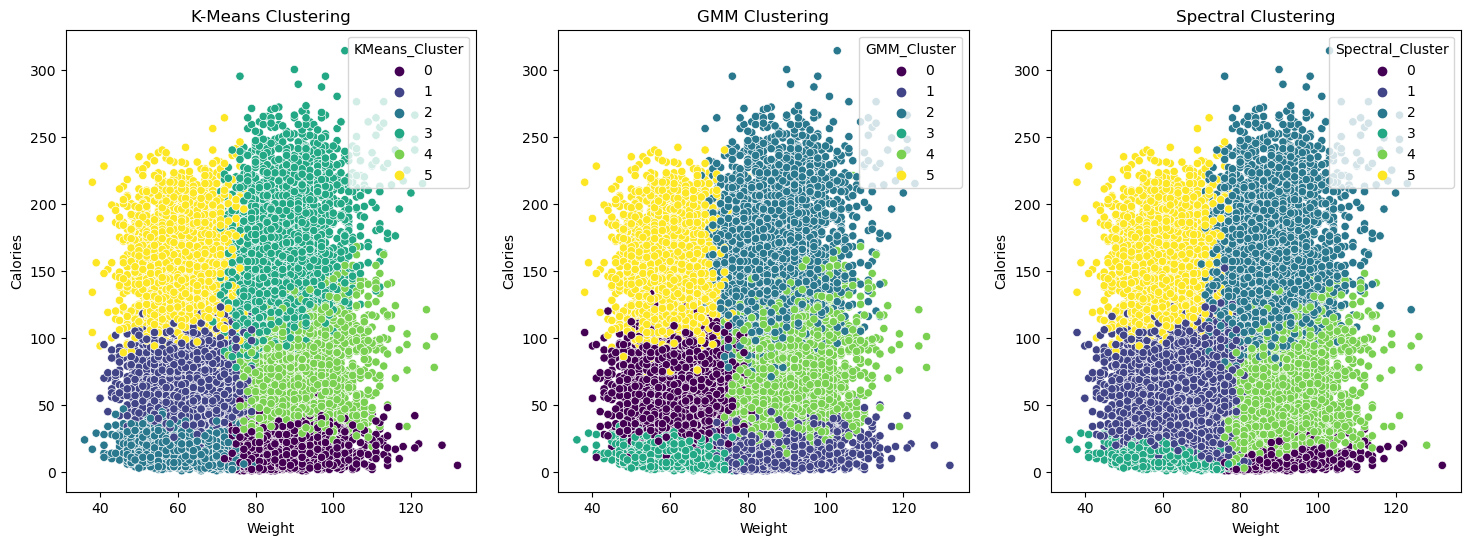

In [41]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Weight', y='Calories', hue=kmeans_labels, data=df, palette='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Weight', y='Calories', hue=gmm_labels, data=df, palette='viridis')
plt.title('GMM Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Weight', y='Calories', hue=spectral_labels, data=df, palette='viridis')
plt.title('Spectral Clustering')

plt.show()
